In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploring the dataset

In [2]:
hr_df = pd.read_csv('hr_data.csv')
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [3]:
hr_df.shape

(14999, 9)

In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


As we are seeing that department and salary are this two are only the categorical variable and all other are numerical variables and missing values are also not present.

In [5]:
sat_df = pd.read_excel('employee_satisfaction_evaluation.xlsx')
sat_df.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [6]:
sat_df.shape

(14999, 3)

We have to merge both dataframes

In [7]:
merge_df = hr_df.set_index('employee_id').join(sat_df.set_index('EMPLOYEE #')).reset_index()
merge_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [8]:
merge_df.shape

(14999, 11)

We do not want employee id it is of no use, 
so just drop that column.

In [9]:
merge_df.drop(columns='employee_id', inplace=True)

In [10]:
merge_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [11]:
merge_df.describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number_project         14999 non-null  int64  
 1   average_montly_hours   14999 non-null  int64  
 2   time_spend_company     14999 non-null  int64  
 3   Work_accident          14999 non-null  int64  
 4   left                   14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   department             14999 non-null  object 
 7   salary                 14999 non-null  object 
 8   satisfaction_level     14972 non-null  float64
 9   last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Data visualization

###### In the last two columns their are 27 missing values

In [13]:
merge_df.isnull().sum()

number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

#### Now we will find which variable is affecting our target(left=0,1) we will do this by finding corelation matrix

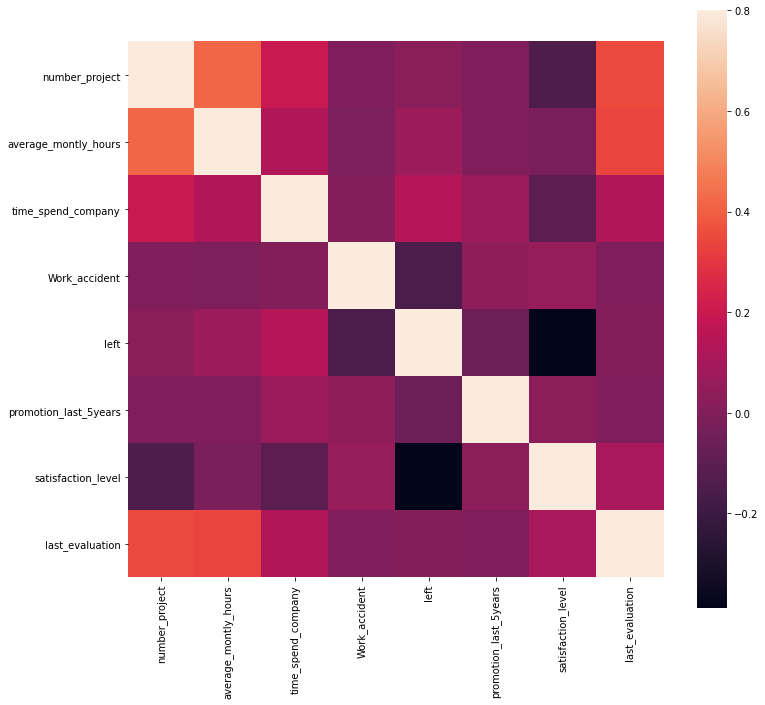

In [14]:
cormat = merge_df.corr()
f, ax = plt.subplots(figsize=(12,11))
sns.heatmap(cormat, vmax=.8, square=True);

Well! from the above graph it signifies that satisfaction_level, work_accident and promotion_last_5year is quiet realted to our target(left). 

Also the last_evaluation with number_projects and averge_monthly_hour has strong corelation   

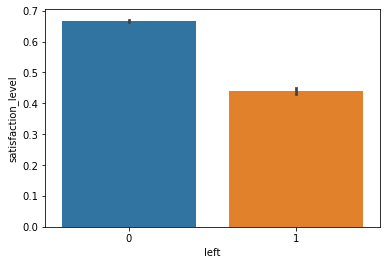

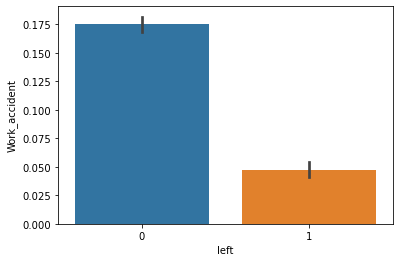

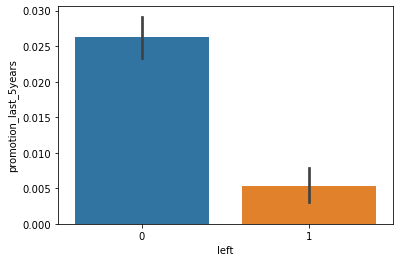

In [15]:
col = ('satisfaction_level', 'Work_accident', 'promotion_last_5years')
for i in col:
    var=i
    plt.figure()
    sns.barplot(x='left', y=var, data=merge_df)

As we are able to see that promotion and work accident are effecting but not much then other variable and that we can see also from corelation matrx also.

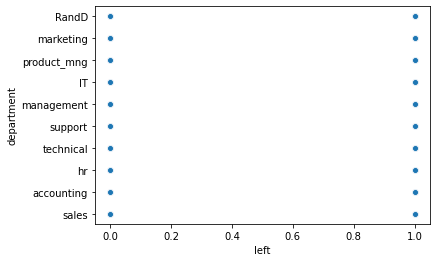

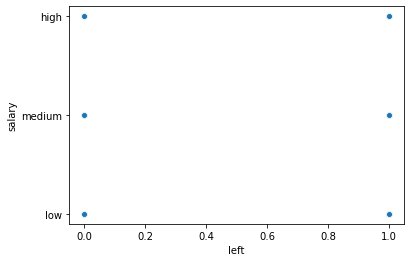

In [16]:
sns.scatterplot(x='left', y='department', data=merge_df);
plt.figure()
sns.scatterplot(x='left', y='salary', data=merge_df);

Same number of employee are leaving from department and also dependency on salary ha ha no way.

# Feature Engineering

In [17]:
f = merge_df.copy()

f[f.isnull().any(axis=1)].iloc[:,-2:]

,satisfaction_level,last_evaluation
18,NaN,NaN
19,NaN,0.89
33,NaN,NaN
53,NaN,NaN
72,NaN,NaN
92,NaN,NaN
107,NaN,NaN
120,NaN,NaN
137,NaN,NaN
175,NaN,NaN


There are nan values in both columns we will replace it with mean value of that variable

In [18]:
f.describe().iloc[:,-2:]

,satisfaction_level,last_evaluation
count,14972.000000,14972.000000
mean,0.612830,0.716125
std,0.248714,0.171138
min,0.090000,0.360000
25%,0.440000,0.560000
50%,0.640000,0.720000
75%,0.820000,0.870000
max,1.000000,1.000000


Here we can see that mean are 0.612830 and 0.7161125 of both variable, we will replace nan value with this mean value.

In [19]:
merge_df.fillna(merge_df.mean(), inplace=True)
merge_df[merge_df.isnull().any(axis=1)]

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


I am showing first 20 rows so that we can see that nan value is replaced by the mean of the value present in the variables

In [20]:
merge_df.head(20)

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38000,0.530000
1,5,262,6,0,1,0,sales,medium,0.80000,0.860000
2,7,272,4,0,1,0,sales,medium,0.11000,0.880000
3,5,223,5,0,1,0,sales,low,0.72000,0.870000
4,2,159,3,0,1,0,sales,low,0.37000,0.520000
5,2,153,3,0,1,0,sales,low,0.41000,0.500000
6,6,247,4,0,1,0,sales,low,0.10000,0.770000
7,5,259,5,0,1,0,sales,low,0.92000,0.850000
8,5,224,5,0,1,0,sales,low,0.89000,1.000000
9,2,142,3,0,1,0,sales,low,0.42000,0.530000


Great it is replaced and we had checked also in the above cell that no nan value is present.

We can also seen above that there are 2 categorical variables:- department and salary so we will do label encoding for this variable.

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sal = le.fit_transform(merge_df['salary'])
sal

array([1, 2, 2, ..., 1, 1, 1])

In [22]:
dep = le.fit_transform(merge_df['department'])
dep

array([7, 7, 7, ..., 8, 8, 8])

In [23]:
merge_df['salary_num'] = sal
merge_df['department_num'] = dep

In [24]:
merge_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,1,0,sales,low,0.38,0.53,1,7
1,5,262,6,0,1,0,sales,medium,0.80,0.86,2,7
2,7,272,4,0,1,0,sales,medium,0.11,0.88,2,7
3,5,223,5,0,1,0,sales,low,0.72,0.87,1,7
4,2,159,3,0,1,0,sales,low,0.37,0.52,1,7


Finally we have to drop both categorical vaariables.

In [25]:
merge_df.drop(['salary','department'], axis=1, inplace=True)

yeah finally done.

# Model Building

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [27]:
X = merge_df.drop(['left'], axis=1)
y = merge_df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
X_test.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
14319,3,177,4,0,0,0.71,0.87,2,3
12228,5,236,5,0,0,0.85,0.95,1,3
1106,2,139,3,0,0,0.44,0.57,1,9
9481,2,183,3,0,0,0.32,0.65,1,7
12540,2,129,3,0,0,0.45,0.54,0,5


In [29]:
y_test.head()

14319    1
12228    1
1106     1
9481     0
12540    1
Name: left, dtype: int64

#### DecisionTree Classifier

In [30]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
prediction_dt = dt.predict(X_test)

In [31]:
prediction_dt

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
score_dt = accuracy_score(y_test, prediction_dt)*100
np.round(score_dt, 3)

97.533

####  Naïve Bayes

In [33]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
prediction_gnb = gnb.predict(X_test)
prediction_gnb

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [34]:
score_gnb = accuracy_score(y_test, prediction_gnb)*100
np.round(score_gnb, 3)

79.6

# prediction

In [35]:
Catagory=['Employee will stay','Employee will Leave']
custom=[[1,500,3,6,0,0.90,0.89,1,8]]
custom_2=[[1400,200,5,7,1,0.85,0.96,2,7]]

In [36]:
print(int(dt.predict(custom)))
print(int(gnb.predict(custom)))

1
0


In [37]:
Catagory[int(dt.predict(custom))] #decision tree prediction

'Employee will Leave'

In [38]:
Catagory[int(gnb.predict(custom))] # naiye bayes prediction

'Employee will stay'

In [39]:
print(int(dt.predict(custom_2)))
print(int(gnb.predict(custom_2)))

0
1


In [40]:
Catagory[int(dt.predict(custom_2))] # decision tree prediction 

'Employee will stay'

In [41]:
Catagory[int(gnb.predict(custom_2))] # naiye bayes prediction

'Employee will Leave'